In [1]:
import pandas as pd
import numpy as np
import requests
import os
import glob
import tweepy
import json
import re
import matplotlib.pyplot as plt

# Gathering Data

In [2]:
# Download "image_predictions.tsv"
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open("image_predictions.tsv", mode='wb') as f:
    f.write(response.content)

In [52]:
# Load archive and predict files
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_predict = pd.read_csv('image_predictions.tsv',sep='\t')

In [4]:
# Query Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

with open("tweet_json.txt", mode='w') as f:
    tweet_id_list = df_archive['tweet_id'].tolist()
    for tweet_id in tweet_id_list: 
        try: 
            tweet = api.get_status(tweet_id)
            json.dump(tweet._json,f)
            f.write('\n')
        except:
            pass

In [5]:
# Load twitter json data into a dataframe
tweets = []
with open("tweet_json.txt", mode='r') as f:
    for line in f:
        tweets.append(json.loads(line))

df_twitter_api = pd.DataFrame()
for i in range(len(tweets)):
    df_twitter_api.loc[i,'tweet_id'] = tweets[i]['id']
    df_twitter_api.loc[i,'favorite_count'] = tweets[i]['favorite_count']
    df_twitter_api.loc[i,'retweet_count'] = tweets[i]['retweet_count']

# Assessing Data

In [9]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
df_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
df_twitter_api

,tweet_id,favorite_count,retweet_count
0,8.924206e+17,38399.0,8433.0
1,8.921774e+17,32891.0,6214.0
2,8.918152e+17,24792.0,4114.0
3,8.916896e+17,41732.0,8561.0
4,8.913276e+17,39902.0,9291.0
5,8.910880e+17,20023.0,3082.0
6,8.909719e+17,11723.0,2047.0
7,8.907292e+17,64815.0,18701.0
8,8.906092e+17,27547.0,4224.0
9,8.902403e+17,31602.0,7323.0


In [13]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 887
Data columns (total 3 columns):
tweet_id          888 non-null float64
favorite_count    888 non-null float64
retweet_count     888 non-null float64
dtypes: float64(3)
memory usage: 67.8 KB


In [17]:
df_archive['rating_numerator'].value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [18]:
df_archive['rating_denominator'].value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [19]:
df_predict['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
teddy                         18
Shetland_sheepdog             18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

# Cleaning Data

## Making copies of original dataframes

In [83]:
df_archive_copy = df_archive
df_predict_copy = df_predict
df_twitter_api_copy = df_twitter_api

## Data Tidiness Issues

### Define Issue #1

Merge 3 dataframes together so that in the final table:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

### Clean Issue #1

In [53]:
merged_df = df_archive.merge(df_predict,how='left',left_on='tweet_id',right_on='tweet_id')
merged_df = merged_df.merge(df_twitter_api,how='left',left_on='tweet_id',right_on='tweet_id')
merged_df = merged_df.reset_index(drop=True)

for i in range(merged_df.shape[0]):
    if merged_df.loc[i,'favorite_count'] == 0:
        merged_df.loc[i,'favorite_count'] = np.nan

### Test Cleaned Issue #1

In [54]:
merged_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24792.0,4114.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,41732.0,8561.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39902.0,9291.0
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,20023.0,3082.0
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,NaN,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,64815.0,18701.0
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,27547.0,4224.0
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,NaN,NaN


In [55]:
merged_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count'],
      dtype='object')

### Define Issue #2

For df_archive, melt dog stage from 4 different columns into one column.

### Clean Issue #2

In [56]:
df_archive = pd.melt(df_archive,id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name','jpg_url', 'img_num'],
        value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name='dog_stage', value_name='dog_stage_value')

### Test Cleaned Issue #2

In [57]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,dog_stage,dog_stage_value
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,doggo,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,doggo,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,doggo,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,doggo,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,NaN,doggo,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,NaN,doggo,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN,NaN,doggo,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,NaN,doggo,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,NaN,NaN,doggo,doggo


### Define Issue #3

Remove irrelevant columns to our analysis: in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, doggo, floofer, pupper, puppo


### Clean Issue #3

In [58]:
merged_df.drop(['in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
                        'retweeted_status_timestamp','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','doggo','floofer',
                        'pupper','puppo'],axis=1,inplace = True)

### Test Cleaned Issue #3

In [59]:
merged_df

,tweet_id,in_reply_to_status_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count
0,892420643555336193,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,NaN,NaN
1,892177421306343426,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,NaN,NaN
2,891815181378084864,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,24792.0,4114.0
3,891689557279858688,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,41732.0,8561.0
4,891327558926688256,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,39902.0,9291.0
5,891087950875897856,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,Chesapeake_Bay_retriever,0.425595,True,20023.0,3082.0
6,890971913173991426,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,Appenzeller,0.341703,True,NaN,NaN
7,890729181411237888,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,Pomeranian,0.566142,True,64815.0,18701.0
8,890609185150312448,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,Irish_terrier,0.487574,True,27547.0,4224.0
9,890240255349198849,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,Pembroke,0.511319,True,NaN,NaN


## Data Quality Issues

### Define Issue #1 

Currently if there are more than one string with the format ##/##, the first string that matches with the format is extracted as the rating. This can be wrong. For example, for the text "After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ" , 9/11 is extracted as the rating. However, the correct rating should be 14/10.

We can improve this by adding a condition. Not only the format must be ##/##, it must be ##/10.

### Define Issue #2

Numerators that are floats should include digits before '.' For example, "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuâ€¦", the numerator should be 9.75, not 75.

### Clean Issue #1 and #2

In [60]:
rating_regex = re.compile(r'(\d+(.\d*)?)/(10)')
for i in range(merged_df.shape[0]):
    try:
        text = merged_df.loc[i,'text']
        merged_df.loc[i,'rating_numerator'] = float(rating_regex.search(text).group(1))
    except:
        pass

### Test Cleaned Issue #1 and #2

In [62]:
merged_df['rating_numerator'].value_counts().sort_index()

0.00         2
1.00         8
2.00         9
3.00        19
4.00        16
5.00        35
6.00        32
7.00        54
8.00       102
9.00       157
9.50         1
9.75         2
10.00      462
11.00      465
11.26        1
11.27        1
12.00      558
13.00      353
13.50        1
14.00       56
15.00        2
17.00        1
20.00        1
24.00        1
44.00        1
45.00        1
60.00        1
80.00        1
84.00        1
88.00        1
99.00        1
121.00       1
143.00       1
144.00       1
165.00       1
182.00       1
204.00       1
420.00       2
666.00       1
1776.00      1
Name: rating_numerator, dtype: int64

### Define Issue #3

Remove the entries the denominators do not equal to 10. I want to look at individual dogs, not dog gangs.

### Clean Issue #3

In [63]:
merged_df = merged_df[merged_df['rating_denominator'] == 10]

### Test Cleaned Issue #3

In [64]:
merged_df['rating_denominator'].value_counts().sort_index()

10    2333
Name: rating_denominator, dtype: int64

### Define Issue #4

Remove reply tweets.

### Clean Issue #4

In [65]:
merged_df = merged_df[merged_df['in_reply_to_status_id'].isnull()]

### Test Cleaned Issue #4

In [66]:
merged_df['in_reply_to_status_id'].value_counts()

Series([], Name: in_reply_to_status_id, dtype: int64)

### Define Issue #5

Remove joke ratings (outiers). For example, the tweet "This is Atticus. He's quite simply America af. 1776/10" 1776 is simply the year the USA was founded.

### Clean Issue #5

In [67]:
merged_df = merged_df[merged_df['rating_numerator'] <= 15]

### Test Cleaned Issue #5

In [68]:
merged_df['rating_numerator'].value_counts().sort_index()

0.00       1
1.00       5
2.00       9
3.00      19
4.00      15
5.00      34
6.00      32
7.00      52
8.00     102
9.00     153
9.75       2
10.00    455
11.00    451
11.26      1
11.27      1
12.00    544
13.00    331
13.50      1
14.00     49
15.00      1
Name: rating_numerator, dtype: int64

### Define Issue #6

Remove non-dogs based on P1 prediction data.

### Clean Issue #6

In [69]:
merged_df = merged_df[merged_df['p1_dog'] != False]
merged_df = merged_df.reset_index(drop=True)

### Test Cleaned Issue #6

In [70]:
merged_df['p1_dog'].value_counts()

True    1504
Name: p1_dog, dtype: int64

### Define Issue #7

Remove dogs whose breed cannot be identified from P1 prediction data.

### Clean Issue #7

In [71]:
merged_df = merged_df[~merged_df['p1_dog'].isnull()]
merged_df = merged_df.reset_index(drop=True)

### Test Cleaned Issue #7

In [72]:
merged_df['p1_dog'].value_counts()

True    1504
Name: p1_dog, dtype: int64

### Define Issue #8

Correct the names of the dogs 'the', 'a', 'an', 'actually'. There maybe more to be corrected, however this is not relevant to our analysis.

### Clean Issue #8

In [75]:
for i in range(merged_df.shape[0]):
    if merged_df.loc[i,'name'] in ['the','a','an','actually']:
        merged_df.loc[i,'name'] = 'None'

### Test Cleaned Issue #8

In [76]:
merged_df['name'].value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Albert          1
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           3
Alfy            1
Alice           2
Amber           1
Ambrose         1
Amy             1
Andru           1
Andy            1
Angel           1
Anna            1
Apollo          1
Aqua            1
Archie          3
Arlen           1
Arlo            1
Arnie           2
Arya            1
               ..
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          3
Winston         6
Wishes          1
Wyatt           2
Yoda            1
Yogi            2
Zara            1
Zeek            1
Zeke            3
Zeus            1
Ziva            1
Zoe             1
Zoey            2
Zooey           1
getting         2
incredibly      1
infuriating     1
just            3
light           1
my              1
not       

### Define Issue #9

Remove retweets

### Clean Issue #9

In [77]:
merged_df = merged_df[~merged_df['text'].str.startswith('RT @')]

### Test Cleaned Issue #9

In [80]:
merged_df['text'].str.startswith('RT @').value_counts()

False    1449
Name: text, dtype: int64

### Define Issue #10

Column tweet_id is Integer type.

### Clean Issue #9

In [85]:
merged_df['tweet_id'] = merged_df['tweet_id'].astype(str)

### Test Cleaned Issue #9

In [86]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1503
Data columns (total 16 columns):
tweet_id                 1449 non-null object
in_reply_to_status_id    0 non-null float64
timestamp                1449 non-null object
source                   1449 non-null object
text                     1449 non-null object
expanded_urls            1449 non-null object
rating_numerator         1449 non-null float64
rating_denominator       1449 non-null int64
name                     1449 non-null object
jpg_url                  1449 non-null object
img_num                  1449 non-null float64
p1                       1449 non-null object
p1_conf                  1449 non-null float64
p1_dog                   1449 non-null object
favorite_count           330 non-null float64
retweet_count            330 non-null float64
dtypes: float64(6), int64(1), object(9)
memory usage: 232.4+ KB


In [81]:
merged_df.to_csv('twitter_archive_master.csv', index=False)

# Analysis and Visualization

### Visualization

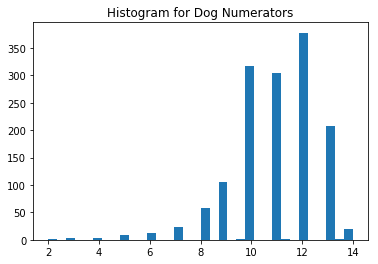

In [82]:
plt.hist(merged_df['rating_numerator'], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Dog Numerators")
plt.show()

### Insight #1 What breed of dogs are submitted the most?

In [168]:
merged_df['p1'].value_counts()[0:10]

golden_retriever      145
Labrador_retriever     96
Pembroke               89
Chihuahua              82
pug                    57
chow                   44
Samoyed                43
Pomeranian             38
toy_poodle             38
malamute               30
Name: p1, dtype: int64

### Insight #2 What breed of dogs received highest ratings?

In [169]:
merged_df.groupby('p1').agg({'rating_numerator':['mean','count']}).sort_values(ascending=False,by=('rating_numerator','mean'))[0:10]

rating_numerator      
                               mean count
p1                                       
Saluki                    12.500000     4
Tibetan_mastiff           12.400000     5
briard                    12.333333     3
Border_terrier            12.142857     7
silky_terrier             12.000000     1
standard_schnauzer        12.000000     1
Irish_setter              11.833333     6
Eskimo_dog                11.777778    18
Gordon_setter             11.750000     4
Samoyed                   11.697674    43

### Insight #3 What breeds of dogs received highest retweets and favorites?

In [182]:
merged_df.groupby('p1').agg({'favorite_count':['mean','count']}).sort_values(ascending=False,by=('favorite_count','mean'))[0:10]

favorite_count      
                                   mean count
p1                                           
boxer                      56439.000000     1
standard_poodle            48761.000000     2
Chihuahua                  33410.444444     9
Mexican_hairless           33349.000000     1
Rottweiler                 33267.000000     2
giant_schnauzer            33205.000000     1
Saluki                     31575.000000     2
Blenheim_spaniel           31539.000000     2
Chesapeake_Bay_retriever   27652.333333     6
Irish_terrier              27546.000000     1

In [185]:
merged_df.groupby('p1').agg({'retweet_count':['mean','count']}).sort_values(ascending=False,by=('retweet_count','mean'))[0:10]

retweet_count      
                          mean count
p1                                  
standard_poodle   27382.333333     3
boxer             17759.000000     1
Rottweiler        11145.000000     2
Chihuahua         10952.090909    11
Mexican_hairless  10303.000000     1
giant_schnauzer    9715.000000     1
Pomeranian         8763.250000     4
Lakeland_terrier   8262.000000     1
Tibetan_mastiff    7704.333333     3
Blenheim_spaniel   7670.500000     2